<a href="https://colab.research.google.com/github/lalit1511/SQL_Projects/blob/main/SQL_Sample_superstore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import sqlite3

# Load the Excel file
# Use 'openpyxl' for .xlsx files
df = pd.read_excel('/content/Sample-Superstore.xlsx', engine='openpyxl')

# Display the first few rows
df.head()

# Create a SQLite database
conn = sqlite3.connect("superstore.db")

# Load the DataFrame into the database
df.to_sql("orders", conn, if_exists="replace", index=False)

# Verify by fetching the first 5 records
pd.read_sql_query("SELECT * FROM orders LIMIT 5", conn)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12 00:00:00,2017-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11 00:00:00,2016-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11 00:00:00,2016-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
pd.read_sql_query("SELECT * FROM orders LIMIT 5", conn)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12 00:00:00,2017-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11 00:00:00,2016-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11 00:00:00,2016-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
pd.read_sql_query("""
SELECT
    ROUND(SUM(Sales), 2) AS Total_Sales,
    ROUND(SUM(Profit), 2) AS Total_Profit,
    SUM(Quantity) AS Total_Quantity
FROM orders
""", conn)


,Total_Sales,Total_Profit,Total_Quantity
0,2297200.86,286397.02,37873


In [6]:
#Sales by Region
pd.read_sql_query("""
SELECT Region, ROUND(SUM(Sales), 2) AS Total_Sales
FROM orders
GROUP BY Region
ORDER BY Total_Sales DESC
""", conn)


,Region,Total_Sales
0,West,725457.82
1,East,678781.24
2,Central,501239.89
3,South,391721.91


In [7]:
# Category-wise Profit
pd.read_sql_query("""
SELECT Category, ROUND(SUM(Profit), 2) AS Total_Profit
FROM orders
GROUP BY Category
ORDER BY Total_Profit DESC
""", conn)


,Category,Total_Profit
0,Technology,145454.95
1,Office Supplies,122490.80
2,Furniture,18451.27


In [8]:
#Which Sub-Categories Are Causing Losses?
pd.read_sql_query("""
SELECT [Sub-Category], ROUND(SUM(Profit), 2) AS Total_Profit
FROM orders
GROUP BY [Sub-Category]
HAVING Total_Profit < 0
ORDER BY Total_Profit ASC
""", conn)


,Sub-Category,Total_Profit
0,Tables,-17725.48
1,Bookcases,-3472.56
2,Supplies,-1189.10


In [9]:
#Top 10 Customers by Total Sales
pd.read_sql_query("""
SELECT [Customer Name], ROUND(SUM(Sales), 2) AS Total_Sales
FROM orders
GROUP BY [Customer Name]
ORDER BY Total_Sales DESC
LIMIT 10
""", conn)


,Customer Name,Total_Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


In [10]:
#States with Highest and Lowest Profit
pd.read_sql_query("""
SELECT State, ROUND(SUM(Profit), 2) AS Total_Profit
FROM orders
GROUP BY State
ORDER BY Total_Profit DESC
LIMIT 10
""", conn)


,State,Total_Profit
0,California,76381.39
1,New York,74038.55
2,Washington,33402.65
3,Michigan,24463.19
4,Virginia,18597.95
5,Indiana,18382.94
6,Georgia,16250.04
7,Kentucky,11199.70
8,Minnesota,10823.19
9,Delaware,9977.37


In [11]:
#Year-wise Sales & Profit Trend
pd.read_sql_query("""
SELECT
    STRFTIME('%Y', [Order Date]) AS Year,
    ROUND(SUM(Sales), 2) AS Total_Sales,
    ROUND(SUM(Profit), 2) AS Total_Profit
FROM orders
GROUP BY Year
ORDER BY Year
""", conn)


,Year,Total_Sales,Total_Profit
0,2015,484247.50,49543.97
1,2016,470532.51,61618.60
2,2017,609205.60,81795.17
3,2018,733215.26,93439.27


In [12]:
#Most Frequently Sold Products
pd.read_sql_query("""
SELECT [Product Name], SUM(Quantity) AS Total_Quantity
FROM orders
GROUP BY [Product Name]
ORDER BY Total_Quantity DESC
LIMIT 10
""", conn)


,Product Name,Total_Quantity
0,Staples,215
1,Staple envelope,170
2,Easy-staple paper,150
3,Staples in misc. colors,86
4,KI Adjustable-Height Table,74
5,Storex Dura Pro Binders,71
6,Avery Non-Stick Binders,71
7,GBC Premium Transparent Covers with Diagonal L...,67
8,"Situations Contoured Folding Chairs, 4/Set",64
9,Staple-based wall hangings,62


In [13]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting in Colab
%matplotlib inline

# Set style
sns.set(style="whitegrid")


<ipython-input-14-7adca578f5c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SubCategory', y='Total_profit', data=subcat_profit,palette='coolwarm')


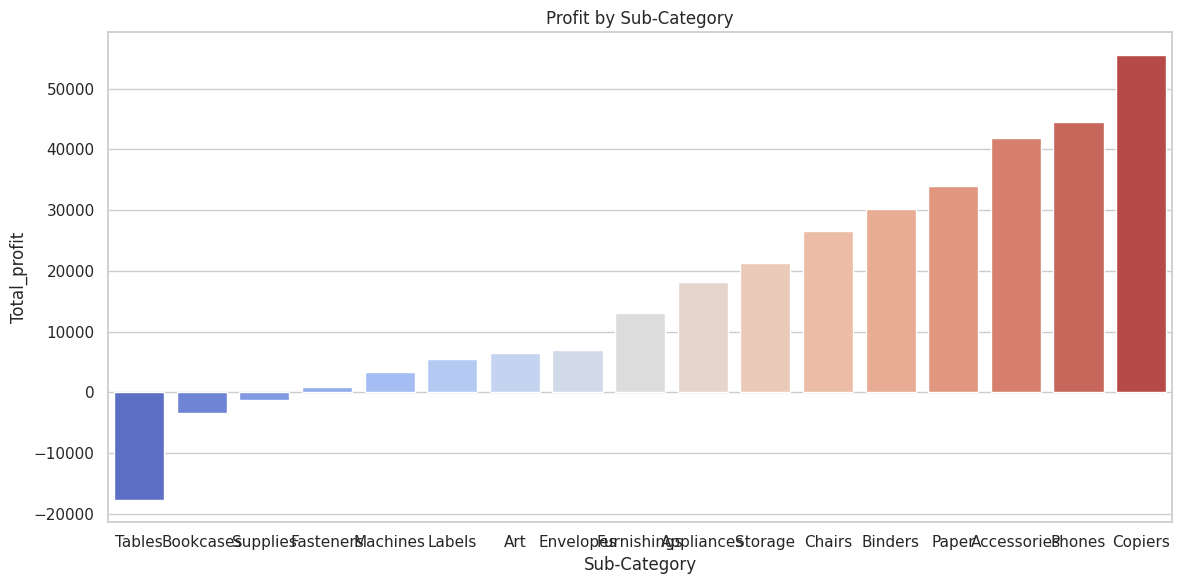

In [14]:
# Profit by Sub-Category (Bar Chart)
subcat_profit=pd.read_sql_query("""SELECT [Sub-Category] as SubCategory ,ROUND(SUM(Profit),2) AS Total_profit FROM orders GROUP BY [Sub-Category] ORDER BY Total_Profit""",conn)

plt.figure(figsize=(12, 6))
sns.barplot(x='SubCategory', y='Total_profit', data=subcat_profit,palette='coolwarm')
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.tight_layout()
plt.show()

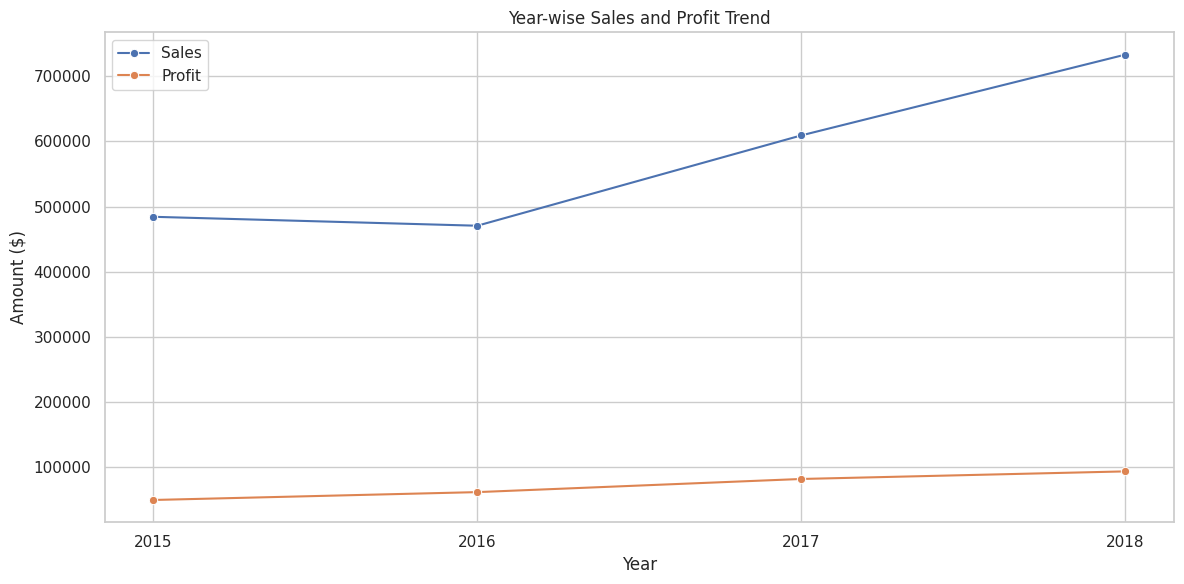

In [15]:
#Year-wise Sales and Profit Trend (Line Chart)
yearly = pd.read_sql_query("""
SELECT
    STRFTIME('%Y', [Order Date]) AS Year,
    ROUND(SUM(Sales), 2) AS Sales,
    ROUND(SUM(Profit), 2) AS Profit
FROM orders
GROUP BY Year
ORDER BY Year
""", conn)

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales', data=yearly, label='Sales', marker='o')
sns.lineplot(x='Year', y='Profit', data=yearly, label='Profit', marker='o')
plt.title('Year-wise Sales and Profit Trend')
plt.ylabel('Amount ($)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-16-5554ab3016cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Customer', x='Total_Sales', data=top_customers, palette='viridis')


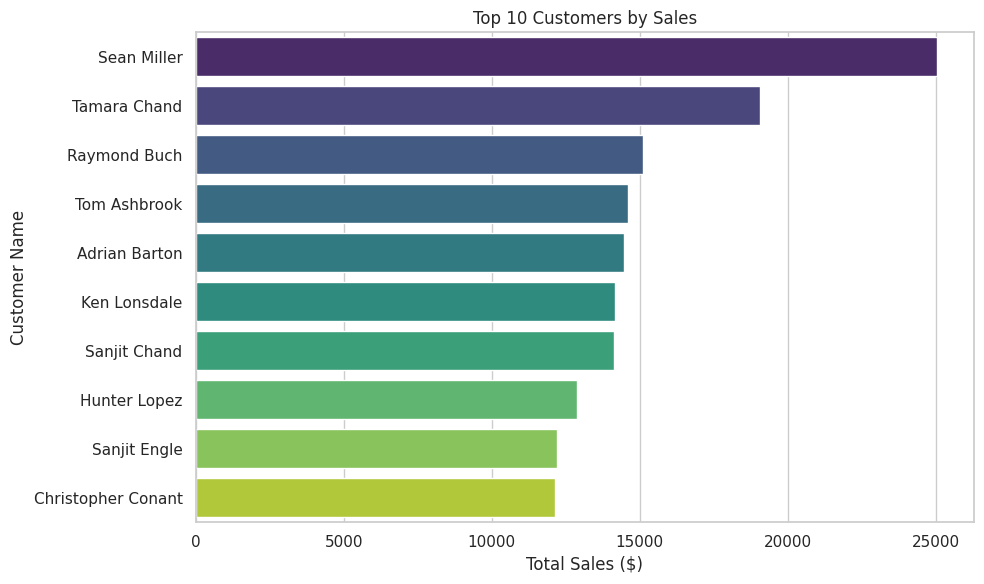

In [16]:
#Top 10 Customers by Sales (Horizontal Bar Chart)
top_customers = pd.read_sql_query("""
SELECT [Customer Name] AS Customer,ROUND(SUM(Sales),2) AS Total_Sales
FROM orders
GROUP BY Customer
ORDER BY Total_Sales DESC
LIMIT 10
""", conn)

# Plot
# Plot
plt.figure(figsize=(10,6))
sns.barplot(y='Customer', x='Total_Sales', data=top_customers, palette='viridis')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

In [17]:
#High Sales but Low/Negative Profit Products

pd.read_sql_query("""SELECT [Product Name], ROUND(SUM(Sales),2) AS Total_Sales, ROUND(SUM(Profit),2) AS Total_Profit
FROM orders
GROUP BY [Product Name]
HAVING Total_Sales > 10000 AND Total_Profit < 0
ORDER BY Total_Sales DESC""",conn)

,Product Name,Total_Sales,Total_Profit
0,Cisco TelePresence System EX90 Videoconferenci...,22638.48,-1811.08
1,GBC DocuBind P400 Electric Binding System,17965.07,-1878.17
2,High Speed Automatic Electric Letter Opener,17030.31,-262.00
3,Lexmark MX611dhe Monochrome Laser Printer,16829.90,-4589.97
4,Martin Yale Chadless Opener Electric Letter Op...,16656.20,-1299.18
5,"Riverside Palais Royal Lawyers Bookcase, Royal...",15610.97,-669.54
6,Bretford Rectangular Conference Table Tops,12995.29,-327.23
7,Cubify CubeX 3D Printer Double Head Print,11099.96,-8879.97


In [18]:
#Customer Segmentation Based on Sales Tier
pd.read_sql_query("""
SELECT [Customer Name],
       ROUND(SUM(Sales), 2) AS Total_Sales,
       CASE
         WHEN SUM(Sales) >= 5000 THEN 'Platinum'
         WHEN SUM(Sales) >= 2000 THEN 'Gold'
         WHEN SUM(Sales) >= 1000 THEN 'Silver'
         ELSE 'Bronze'
       END AS Tier
FROM orders
GROUP BY [Customer Name]
ORDER BY Total_Sales DESC
""", conn)


,Customer Name,Total_Sales,Tier
0,Sean Miller,25043.05,Platinum
1,Tamara Chand,19052.22,Platinum
2,Raymond Buch,15117.34,Platinum
3,Tom Ashbrook,14595.62,Platinum
4,Adrian Barton,14473.57,Platinum
...,...,...,...
788,Roy Skaria,22.33,Bronze
789,Mitch Gastineau,16.74,Bronze
790,Carl Jackson,16.52,Bronze
791,Lela Donovan,5.30,Bronze


In [19]:
#Most Efficient Shipping Modes (Sales/Quantity Ratio)
pd.read_sql_query("""
SELECT [Ship Mode],
       ROUND(SUM(Sales)/SUM(Quantity), 2) AS Sales_Per_Item,
       ROUND(SUM(Sales), 2) AS Total_Sales,
       SUM(Quantity) AS Total_Quantity
FROM orders
GROUP BY [Ship Mode]
ORDER BY Sales_Per_Item DESC
""", conn)


,Ship Mode,Sales_Per_Item,Total_Sales,Total_Quantity
0,Same Day,65.49,128363.13,1960
1,Second Class,61.86,459193.57,7423
2,First Class,61.73,351428.42,5693
3,Standard Class,59.58,1358215.74,22797


In [20]:
#Products with Highest Profit Margins
pd.read_sql_query("""
SELECT [Product Name],
       ROUND(SUM(Sales), 2) AS Total_Sales,
       ROUND(SUM(Profit), 2) AS Total_Profit,
       ROUND((SUM(Profit) * 100.0 / SUM(Sales)), 2) AS Profit_Margin
FROM orders
GROUP BY [Product Name]
HAVING Total_Sales > 1000
ORDER BY Profit_Margin DESC
LIMIT 10
""", conn)


,Product Name,Total_Sales,Total_Profit,Profit_Margin
0,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.98,1995.99,50.00
1,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,3404.50,1668.21,49.00
2,Ativa V4110MDD Micro-Cut Shredder,7699.89,3772.95,49.00
3,Zebra ZM400 Thermal Label Printer,6965.70,3343.54,48.00
4,Hewlett-Packard Deskjet 3050a All-in-One Color...,3040.00,1459.20,48.00
5,Xerox 1934,1097.21,526.21,47.96
6,Xerox 1917,1222.75,574.69,47.00
7,Cisco SPA525G2 5-Line IP Phone,1379.92,648.56,47.00
8,"GE 48"" Fluorescent Tube, Cool White Energy Sav...",2699.06,1260.22,46.69
9,Xerox 1908,1712.99,799.39,46.67


In [21]:
#Month-over-Month Sales Trend
pd.read_sql_query("""
SELECT
    STRFTIME('%Y-%m', [Order Date]) AS Month,
    ROUND(SUM(Sales), 2) AS Total_Sales
FROM orders
GROUP BY Month
ORDER BY Month
""", conn)


,Month,Total_Sales
0,2015-01,14236.90
1,2015-02,4519.89
2,2015-03,55691.01
3,2015-04,28295.35
4,2015-05,23648.29
5,2015-06,34595.13
6,2015-07,33946.39
7,2015-08,27909.47
8,2015-09,81777.35
9,2015-10,31453.39
